In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [38]:
df=pd.read_csv("C:/Users/Administrator/Downloads/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [41]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [42]:
df=df.drop(columns=["CustomerID"])
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [43]:
X=df.drop(columns=['Genre'])
y=df['Genre']

In [44]:
num_cols=X.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_cols=X.select_dtypes(include=['object']).columns.to_list()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
preprocessor= ColumnTransformer(
    transformers=[
        ('num',StandardScaler(), num_cols),
        ('cat',OrdinalEncoder(), cat_cols)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'Annual Income (k$)',
                                  'Spending Score (1-100)']),
                                ('cat', OrdinalEncoder(), [])])

In [47]:
pipeline=Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('kmeans', KMeans(n_clusters=5, random_state=101))
    ]
)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('cat', OrdinalEncoder(),
                                                  [])])),
                ('kmeans', KMeans(n_clusters=5, random_state=101))])

In [48]:
pipeline.fit(X_train)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('cat', OrdinalEncoder(),
                                                  [])])),
                ('kmeans', KMeans(n_clusters=5, random_state=101))])

In [49]:
y_test.unique()

array(['Female', 'Male'], dtype=object)

In [50]:
y_pred = pipeline.predict(X_test)
y_pred

array([3, 1, 3, 1, 1, 1, 1, 1, 2, 3, 0, 1, 0, 1, 2, 2, 3, 4, 0, 3, 0, 2,
       2, 3, 3, 1, 4, 2, 2, 4, 4, 2, 1, 4, 3, 4, 2, 0, 0, 0, 4, 0, 0, 0,
       1, 4, 3, 3, 3, 3, 3, 3, 1, 0, 3, 2, 4, 0, 3, 3])

In [52]:
train_clusters = pipeline.predict(X_train)
test_clusters = pipeline.predict(X_test)
train_clusters,test_clusters    

(array([1, 2, 2, 1, 3, 1, 0, 3, 1, 1, 2, 4, 0, 1, 3, 3, 2, 2, 1, 2, 0, 2,
        0, 2, 2, 3, 0, 2, 1, 2, 3, 3, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0,
        3, 3, 1, 0, 1, 2, 3, 4, 3, 0, 2, 3, 4, 2, 3, 2, 3, 1, 3, 3, 3, 2,
        2, 0, 1, 3, 0, 3, 0, 4, 1, 1, 2, 4, 2, 4, 4, 2, 3, 3, 3, 0, 1, 1,
        3, 2, 2, 0, 1, 0, 1, 4, 3, 2, 3, 2, 4, 3, 1, 4, 3, 0, 0, 1, 1, 0,
        0, 3, 1, 4, 0, 1, 0, 2, 3, 0, 3, 1, 3, 2, 0, 3, 1, 1, 0, 2, 3, 1,
        2, 3, 3, 1, 1, 3, 3, 3]),
 array([3, 1, 3, 1, 1, 1, 1, 1, 2, 3, 0, 1, 0, 1, 2, 2, 3, 4, 0, 3, 0, 2,
        2, 3, 3, 1, 4, 2, 2, 4, 4, 2, 1, 4, 3, 4, 2, 0, 0, 0, 4, 0, 0, 0,
        1, 4, 3, 3, 3, 3, 3, 3, 1, 0, 3, 2, 4, 0, 3, 3]))

In [53]:
X_train['Cluster'] = train_clusters
X_test['Cluster'] = test_clusters

X_train

,Age,Annual Income (k$),Spending Score (1-100),Cluster
85,48,54,46,1
183,29,98,88,2
127,40,71,95,2
53,59,43,60,1
100,23,62,41,3
...,...,...,...,...
63,54,47,59,1
70,70,49,55,1
81,38,54,55,3
11,35,19,99,3


In [55]:
sil_score_1=silhouette_score(X_train, train_clusters)
sil_score_2=silhouette_score(X_test, test_clusters)
sil_score_1, sil_score_2

(0.40300229952930827, 0.44671539487027656)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

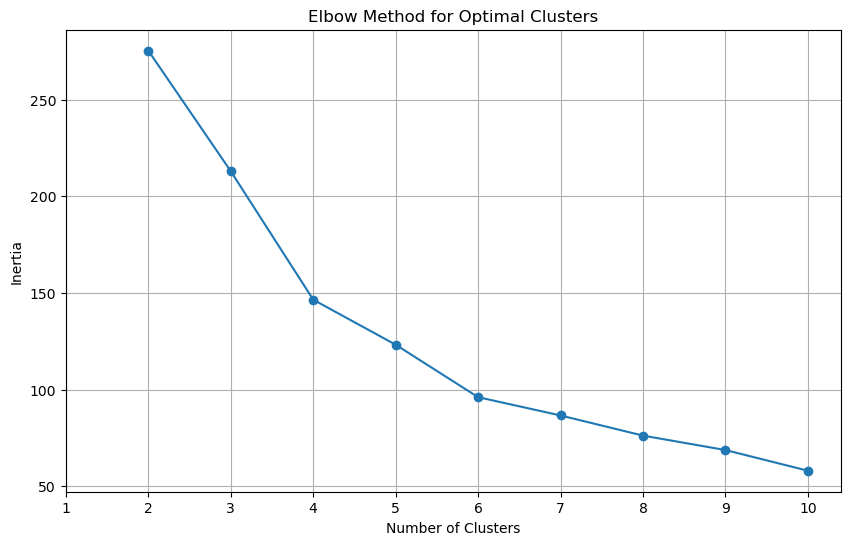

In [62]:
#Elbow Method to find optimal number of clusters

inertia=[]
sil_scores=[]

for i in range(2,11):
    pipeline.set_params(kmeans__n_clusters=i)
    pipeline.fit(X_train)
    
    inertia.append(pipeline.named_steps['kmeans'].inertia_)
    
    X_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
    labels = pipeline.named_steps['kmeans'].labels_
    sil_scores.append(silhouette_score(X_transformed, labels))
    
plt.figure(figsize=(10,6))
plt.plot(range(2,11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

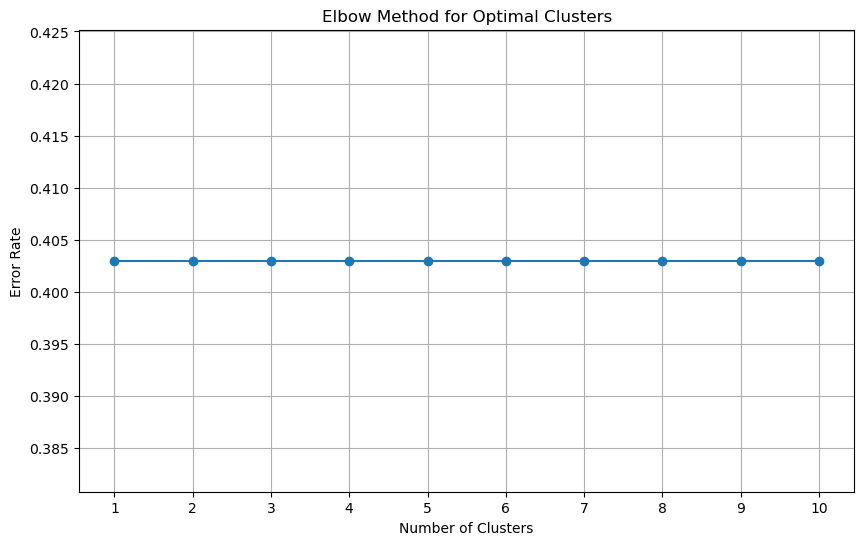

In [59]:
error_rate=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=101)
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_train)
    error_rate.append(sil_score_1)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), error_rate, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Error Rate')
plt.xticks(range(1,11))
plt.grid()
plt.show()